In [1697]:
try:
    from keras_preprocessing import image as img
    import os
    from matplotlib import pyplot as plt
    import idx2numpy
    import keras_preprocessing
    import tensorflow as tf
    import numpy as np
    import keras
    from functools import partial
except:
    %pip install manim
    %pip install colour
    %pip install matplotlib
    %pip install tensorflow.keras
    %pip install pydot
    %pip install pydotplus
    %pip install graphviz
    %pip install ipykernel
    %pip install keras_preprocessing
    %pip install matplotlib
    %pip install idx2numpy
    %pip install pillow
    %pip install tensorflow==2.18.0
    %pip install keras==3.8.0
    from keras_preprocessing import image as img
    import os
    from matplotlib import pyplot as plt
    import idx2numpy
    import keras_preprocessing
    import tensorflow as tf
    import numpy as np
    import keras
    from functools import partial

In [1698]:
modelo_dig = tf.keras.models.load_model("model_network/output00.h5")

In [1699]:
nbits = 128
point_fixed = 16

In [1700]:
os.system("rm ./simulation/I.txt")

0

In [1701]:
sizt = 28
path = "mnist/data/t10k-images-idx3-ubyte"

In [1702]:
def int2comp2(val, nbits=nbits):
    return hex((val + (1 << nbits)) % (1 << nbits))


In [1703]:
def comp2int(val, nbits=nbits):
    val=int(val,16)
    if(val & 1 << nbits-1):
        return (~val+1)%(1<<nbits)*(-1)
    return val


In [1704]:
1 << 31

2147483648

In [1705]:
a =  65525
a
comp2int(str(a))

415013

In [1706]:
def concat(n,nbits=nbits,fator=1):
    return [comp2int(n,nbits)/fator]

In [1707]:
def concat2(n,nbits=nbits,fator=64):
    print([comp2int(n,nbits)/fator])
    return [comp2int(n,nbits)/fator]

In [1708]:
def import_img(path_file,fator=1):
    out2 = path_file
    m2=[]
    k2 = out2.readlines()
    for i in k2:
        m2.append(list(map(concat,i.split())))
    plt.imshow(m2,cmap="gray")
    return np.array(m2).copy()

In [1709]:
def import_img2(path_file,fator=1):
    out2 = path_file
    m2=[]
    k2 = out2.readlines()
    for i in k2:
        m2.append(list(map(concat2,i.split())))
    plt.imshow(m2,cmap="gray")
    return np.array(m2).copy()

In [1710]:
def exportInput_txt(imag,path_file,nbits=16):
    for i in imag:
        for j in i:
            strtmp = int2comp2(1 if(j >=50) else 0, nbits)[2:]
            strtmp2 = strtmp+' '
            print(strtmp2,end=' ')
            path_file.write(strtmp2)
            # print(f'{strtmp2}',end='  ')
        print("\n")
        path_file.write("\n")
    path_file.close()


In [1711]:
def kernel_txt(nbits,point_fixed,i,j,kernel,string='Kernel'):
    ker = open(f"simulation/{string}{j}{i}.txt",'w')
    kernel0_0 = np.array(kernel)
    for i in kernel0_0:
        for j in i:
            print(int((j*2**point_fixed)),end=' ')
            strtmp2 = int2comp2(int(j*2**point_fixed),nbits)+' '
            ker.write(strtmp2[2:])
            # print(f'{strtmp2}',end='  ')
        ker.write("\n")
        print('\n')
    ker.close()

In [1712]:
def bias_txt(nbits,point_fixed,i,bias,string='bias'):
    ker = open(f"simulation/{string}{i}.txt",'w')
    kernel0_0 = np.array(bias)
    base = point_fixed
    for j in kernel0_0:
        # for j in i:
            print((int(j*2**base)),end=' ')
            strtmp2 = int2comp2(int(j*2**point_fixed),nbits)+' '
            ker.write(strtmp2[2:])
            # print(f'{strtmp2}',end='  ')
        # ker.write("\n")
            # print('\n')
    ker.close()

In [1713]:
sizeM = open("./simulation/sizeM.txt","w")
sizeM.write(str(sizt))
sizeM.close()
f = open("./simulation/I.txt","w")

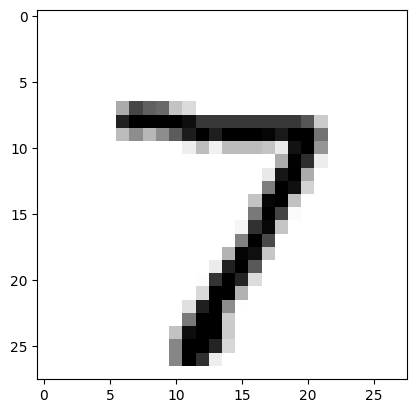

In [1714]:
array = idx2numpy.convert_from_file(path)[0]
plt.imshow(array,cmap='binary')
# array

In [1715]:
exportInput_txt(imag=array,path_file=f)

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  

0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  1  1  1  0  1  1  1  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [1716]:
array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [1717]:
modelo_dig.predict(array.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [1718]:
modelo_dig.predict(array.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [1719]:
modelo_dig.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 2)      │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 4)      │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,140 (4.46 KB)

 Trainable params: 1,138 (4.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [1720]:
kernels = modelo_dig.weights[5]


In [1721]:
bias = np.array(modelo_dig.weights[1])
bias

array([-0.09287094, -0.16631776], dtype=float32)

In [1722]:
bias_txt(nbits,point_fixed,0,modelo_dig.weights[1])

-6086 -10899 

In [1723]:
bias_txt(nbits,point_fixed,5,modelo_dig.weights[5])

1497 46987 -3555 -34494 12546 12581 -16434 32905 -47922 -31668 

In [1724]:
cc = modelo_dig.weights[4]

In [1725]:
bias_txt(nbits,point_fixed,2,modelo_dig.weights[1])

-6086 -10899 

In [1726]:
modelo_dig.weights[0]
kernels = modelo_dig.weights[0]
kernels;

In [1727]:
bias_txt(nbits,point_fixed,2,modelo_dig.weights[3])


-17000 -21842 -3610 -9976 

In [1728]:
lim = np.array(kernels.shape)[::-1][0]
for i in range(lim):
    kernel_txt(nbits,point_fixed,i,0,modelo_dig.weights[0][:,:,0,i])
    print("--------------------------------------------------------------------",i+1)

-4373 4444 -25443 12681 29314 

-10553 -12848 36105 22277 20520 

-8755 23110 26802 41154 -13919 

15271 31485 21824 17352 -18262 

17875 18636 4982 7122 -20482 

-------------------------------------------------------------------- 1
-2804 -2912 -2793 -6999 -15462 

27369 -5126 -12234 -2377 -33152 

28603 24858 11899 -8876 15630 

19341 38521 17704 46785 22449 

-7686 16130 23242 2428 24345 

-------------------------------------------------------------------- 2


kernel0

In [1729]:
#  modelo_dig.weights[2].shape

In [1730]:
# lims = int(np.array(kernels2d_1.shape)[::-1][0])
# limi = int(np.array(kernels2d_1.shape)[::-1][1])
# (limi,lims)

In [1731]:
kernels2d_1 = modelo_dig.weights[2]
lims = int(np.array(kernels2d_1.shape)[::-1][0])
limi = int(np.array(kernels2d_1.shape)[::-1][1])
for i in range(limi):
    for j in range(lims):
        print("-------------------------------",i+1,j+1)
        kernel_txt(nbits,point_fixed,j,i,kernels2d_1[:,:,i,j],string=f"kernels2d_")


------------------------------- 1 1
21009 -2835 -9069 

3467 68873 26361 

31606 49562 62922 

------------------------------- 1 2
-20545 -23269 -14688 

2602 33675 30856 

-1705 -31335 -11183 

------------------------------- 1 3
-35217 -27179 -16590 

15777 7648 11771 

-18430 -8697 -8573 

------------------------------- 1 4
17362 -3496 19205 

36907 8785 -2868 

-13449 12031 -4792 

------------------------------- 2 1
1535 -33057 -5734 

-29176 -31630 -30490 

-5266 -30785 -15444 

------------------------------- 2 2
28624 48082 43662 

23918 -13272 -2653 

-27249 -22334 -34597 

------------------------------- 2 3
19735 -23054 29137 

63222 31582 11696 

21043 18445 -12896 

------------------------------- 2 4
-11482 21607 -4071 

-5016 21386 -16824 

20445 -1645 36247 



In [1732]:
kernel_txt(nbits,point_fixed,0,0,modelo_dig.weights[4],string="danse.txt")

-20942 -34159 -17746 -27531 -10419 -11696 3726 -38022 5190 -5416 

-57420 -32881 1562 -18828 -2821 -55509 -42142 -13148 -58997 -69282 

-21607 -11174 -31443 -14846 9440 -29675 -23341 -4442 -28045 -6492 

-24045 -27619 -32260 -15533 -13497 -26465 4198 3270 -9666 -31218 

-29487 -29510 -16518 -26321 9520 -10156 698 -19132 3152 3184 

-24652 -12029 -7489 10808 -80726 -33771 -65941 -1978 -13132 -5637 

-23589 -20519 -16420 -8556 2508 1366 -30737 12446 -2575 -16102 

-14612 -16722 -4660 -15539 977 -5708 -11360 6157 -7077 -26674 

-11831 -10515 -18957 -24774 -2662 -8283 9608 -15054 -6851 4161 

-27150 -79820 2992 -12331 -71101 -14476 -13949 11081 -13680 -21141 

1176 -21725 -15765 -2634 -36535 -7335 -42235 -1149 -16347 15013 

-5350 8240 -3660 -12643 6396 -25108 -16063 8025 5542 -28122 

-25628 1067 -33212 -25112 22164 -2154 -9153 -6291 -21168 -28708 

-10517 -28536 -22820 -15780 -88767 28641 17948 -19805 -20392 -24048 

4279 -6421 5161 9801 -19074 -24164 -55214 -6601 -13514 14393 

7124 114

In [1733]:
out = open("simulation/maxpooling0.txt","r")

klin1 = []
m1=[]
k= out.readlines()
for i in k:
    m1.append(list(map(concat,i.split())))


In [1734]:
# array_out =[]

# for i in range(1):
#     array_out.append(open(f"./simulation/maxIxKernelPooling{i}.txt","r"))
# klin2 = []
# plt.figure(figsize=(30,2))
# for ii in range(2):
#     k2 = array_out[ii].readlines()
#     m2=[]
#     for i in k2:
#         m2.append(list(map(concat,i.split())))
#     plt.subplot(1,2,ii+1)
#     plt.imshow(m2,cmap="gray")
# # plt.imshow(m2)

# for i in range(2):
#     array_out[i].close()


In [1735]:
# m2

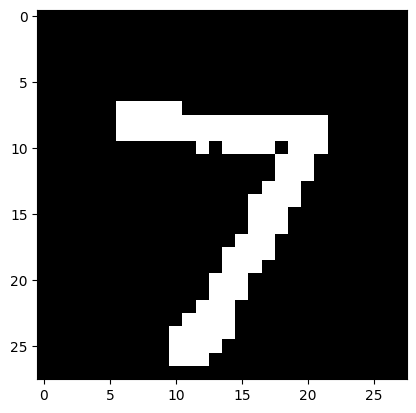

In [1736]:
out2 = open("./simulation/I.txt","r")
import_img(path_file=out2);

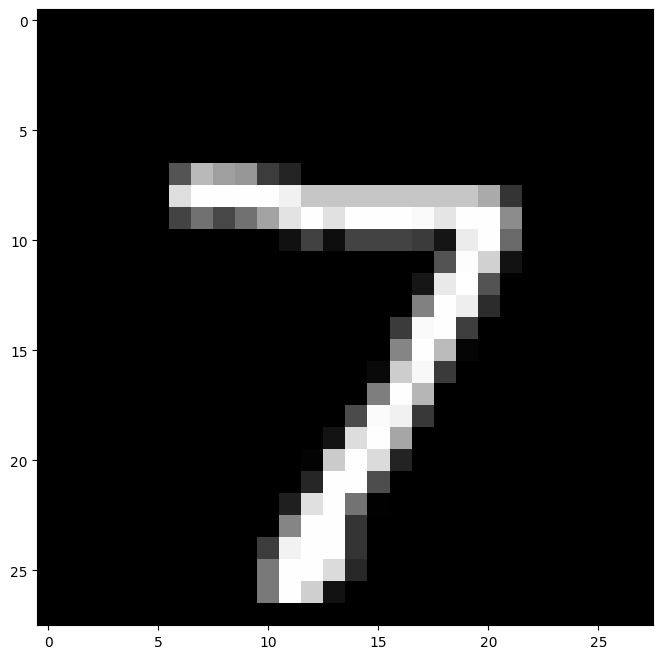

In [1737]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.imshow(array,cmap="gray")


In [1738]:
plt.imsave("7.png",array,cmap="gray")

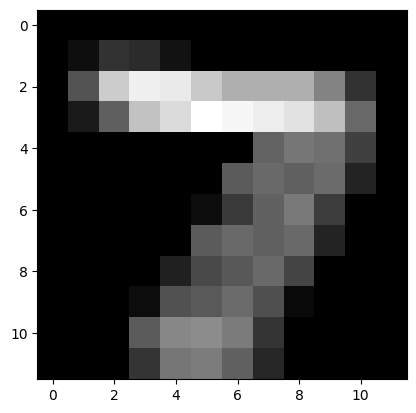

In [1739]:
import_img(path_file=open('simulation/maxpooling1.txt'));


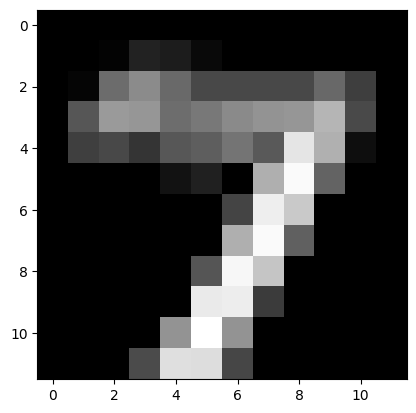

In [1740]:
import_img(path_file=open('simulation/maxpooling0.txt'));


[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[65.1875]
[664.515625]
[553.234375]
[184.203125]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[107.484375]
[2089.34375]
[2687.9375]
[2044.90625]
[1401.828125]
[1401.828125]
[1401.828125]
[1401.828125]
[2007.203125]
[1205.953125]
[0.0]
[0.0]
[1655.328125]
[2961.15625]
[2898.078125]
[2112.96875]
[2318.46875]
[2659.46875]
[2863.390625]
[2886.4375]
[3490.0]
[1430.25]
[0.0]
[0.0]
[1229.78125]
[1396.375]
[1031.84375]
[1674.875]
[1818.484375]
[2237.265625]
[1712.578125]
[4407.90625]
[3395.984375]
[282.578125]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[362.9375]
[630.515625]
[0.0]
[3373.15625]
[4810.296875]
[1917.5625]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[1312.0625]
[4583.734375]
[3881.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[3373.15625]
[4810.296875]
[1849.234375]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[1653.0625]
[4751.75]
[3803.15625]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[0.

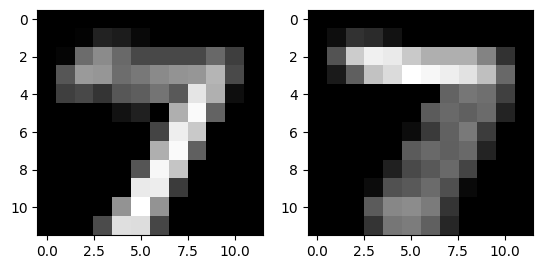

In [1741]:
plt.subplot(1,2,1)
import_img2(path_file=open('simulation/maxpooling0.txt'));
plt.subplot(1,2,2)
import_img2(path_file=open('simulation/maxpooling1.txt'));


[6053021.125]
[61657447.171875]
[122052356.0625]
[88768252.921875]
[53531636.109375]
[45499631.171875]
[47214489.53125]
[96597872.40625]
[120450354.5]
[84579859.953125]
[125284511.828125]
[174664884.0625]
[60690173.203125]
[0.0]
[0.0]
[22780108.40625]
[63180591.015625]
[163736260.734375]
[193989914.671875]
[104899231.328125]
[189371358.59375]
[126493549.921875]
[61586519.734375]
[0.0]
[43940751.921875]
[30390256.703125]
[160317889.625]
[243422528.140625]
[192562165.03125]
[49038557.390625]
[65268866.828125]
[54974990.28125]
[48362791.625]
[114194945.46875]
[58393971.9375]
[166684464.484375]
[376099082.9375]
[482786163.453125]
[200485425.375]
[0.0]
[0.0]
[12519694.5625]
[20788853.78125]
[38810563.25]
[67052204.453125]
[287710984.484375]
[562600045.859375]
[396708208.421875]
[116343746.9375]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[129759934.515625]
[422138731.546875]
[529008106.046875]
[283338001.390625]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[17774744.765625]
[273911557.65625]
[562858822.890625]
[4014518

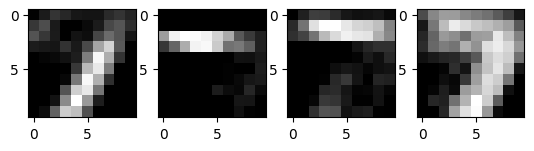

In [1742]:
plt.subplot(1,4,1)
import_img2(path_file=open('simulation/convIxKernelOut_F01.txt'));
plt.subplot(1,4,2)
import_img2(path_file=open('simulation/convIxKernelOut_F02.txt'));
plt.subplot(1,4,3)
import_img2(path_file=open('simulation/convIxKernelOut_F03.txt'));
plt.subplot(1,4,4)
import_img2(path_file=open('simulation/convIxKernelOut_F04.txt'));

[174664884.0625]
[122052356.0625]
[53531636.109375]
[163736260.734375]
[193989914.671875]
[189371358.59375]
[114194945.46875]
[166684464.484375]
[482786163.453125]
[200485425.375]
[12519694.5625]
[38810563.25]
[422138731.546875]
[562600045.859375]
[116343746.9375]
[0.0]
[192607227.78125]
[562858822.890625]
[401451829.421875]
[943687.421875]
[27429866.8125]
[463370882.453125]
[580659560.53125]
[67741982.21875]
[257662.34375]
[0.0]
[0.0]
[0.0]
[0.0]
[0.0]
[416092280.46875]
[441380365.75]
[427639703.25]
[294077138.84375]
[164416515.953125]
[0.0]
[0.0]
[0.0]
[30733240.3125]
[51616920.390625]
[0.0]
[0.0]
[49793442.34375]
[21808823.984375]
[66817209.203125]
[0.0]
[0.0]
[0.0]
[38778580.0]
[37847278.40625]
[208763941.90625]
[460289413.609375]
[463447595.03125]
[385741920.359375]
[346763998.59375]
[122170986.734375]
[336830750.859375]
[436324143.625]
[419779034.328125]
[317537475.234375]
[0.0]
[0.0]
[42232454.171875]
[50108624.015625]
[73595828.3125]
[0.0]
[70276965.125]
[104424347.796875]
[368

array([[[1.87561643e+08],
        [3.28616020e+08],
        [3.02505676e+08],
        [2.64376541e+08],
        [2.20290877e+08]],

       [[1.45357631e+08],
        [2.13076287e+08],
        [2.45209770e+08],
        [3.29810175e+08],
        [2.99619010e+08]],

       [[3.62861384e+07],
        [6.43593607e+07],
        [1.99621026e+08],
        [3.18197997e+08],
        [2.87430247e+08]],

       [[7.61511228e+06],
        [4.16596311e+07],
        [2.49390073e+08],
        [3.07626134e+08],
        [1.62919474e+08]],

       [[5.35191376e+07],
        [2.25472987e+08],
        [3.54977288e+08],
        [2.85385338e+08],
        [0.00000000e+00]]])

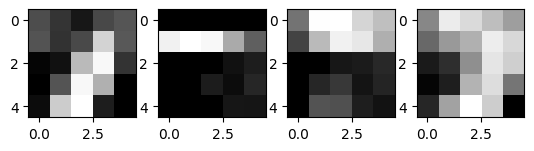

In [1743]:
plt.subplot(1,4,1)
import_img2(path_file=open('simulation/maxpoolingF1.txt'));
plt.subplot(1,4,2)
import_img2(path_file=open('simulation/maxpoolingF2.txt'));
plt.subplot(1,4,3)
import_img2(path_file=open('simulation/maxpoolingF3.txt'));
plt.subplot(1,4,4)
import_img2(path_file=open('simulation/maxpoolingF4.txt'))

In [1744]:
# plt.imsave()

In [1745]:
# img.save_img("./images/preprocessamento.jpg",array)


In [1746]:
# os.system("rm ./images/preprocessamento.jpg")
# os.system("rm ./images/posprocessamento.jpg")

# img.save_img("./images/preprocessamento.jpg",array)
# img.save_img("./images/posprocessamento.jpg",m1)
# img.save_img("./images/maxpoolingposprocessamento.jpg",m2)


In [1747]:
dens = open("simulation/dense.txt")
klin2 = []
m2=[]
k2 = dens.readlines()
for i in k2:
    m2.append(list(map(concat,i.split()))[0][0])
m2 = np.array(m2)
print(np.array(m2))

[-9.84447390e+08 -1.93164796e+09 -5.98925384e+08 -1.34772780e+09
 -1.62104961e+09 -1.53697986e+09 -1.43738183e+09 -1.68126308e+09
 -6.43495879e+08 -1.86939235e+09]


In [1749]:
a =m2
n = 32
s = sum([np.exp(a[i]/2**n) for i in range(len(a))])
h = (np.array([a[i]/(2**n)/s for i in range(len(a))]))
(h,(h*(-1)).argmax())
# (h*(-1)).arg

(array([-0.0313219 , -0.06145873, -0.01905585, -0.04288029, -0.0515765 ,
        -0.04890168, -0.04573279, -0.0534923 , -0.02047394, -0.05947796]),
 np.int64(1))

hex(1)